In [13]:
from matplotlib import pyplot as plt
import numpy as np
import torch
from torchvision import transforms
from torchvision import datasets

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)



cifar10 = datasets.CIFAR10('data', train=True, download=True)
cifar10_val = datasets.CIFAR10('data', train=False, download=True)



cifar10 = datasets.CIFAR10('data', train=True, download=False,
                          transform=transforms.ToTensor())

# Hier werden nur Vögel und Flugezuge übernommen:
label_map = {0: 0, 2: 1}
cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]

Files already downloaded and verified
Files already downloaded and verified


In [14]:
# NLLLoss: 

import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100
loss_NLL = np.zeros(n_epochs)
for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_NLL[epoch-1] =  loss.detach().numpy()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.348278
Epoch: 1, Loss: 0.766968
Epoch: 2, Loss: 0.550801
Epoch: 3, Loss: 0.331531
Epoch: 4, Loss: 0.330002
Epoch: 5, Loss: 0.646172
Epoch: 6, Loss: 0.522668
Epoch: 7, Loss: 0.766541
Epoch: 8, Loss: 0.349954
Epoch: 9, Loss: 0.369158
Epoch: 10, Loss: 0.554411
Epoch: 11, Loss: 0.391621
Epoch: 12, Loss: 0.809436
Epoch: 13, Loss: 0.416581
Epoch: 14, Loss: 0.610174
Epoch: 15, Loss: 0.500322
Epoch: 16, Loss: 0.366374
Epoch: 17, Loss: 0.504939
Epoch: 18, Loss: 0.564688
Epoch: 19, Loss: 0.450966
Epoch: 20, Loss: 0.364062
Epoch: 21, Loss: 0.649405
Epoch: 22, Loss: 0.293993
Epoch: 23, Loss: 0.451320
Epoch: 24, Loss: 0.344897
Epoch: 25, Loss: 0.363063
Epoch: 26, Loss: 0.286010
Epoch: 27, Loss: 0.289554
Epoch: 28, Loss: 0.417923
Epoch: 29, Loss: 0.465560
Epoch: 30, Loss: 0.869989
Epoch: 31, Loss: 0.505219
Epoch: 32, Loss: 0.463117
Epoch: 33, Loss: 0.376868
Epoch: 34, Loss: 0.727421
Epoch: 35, Loss: 0.462450
Epoch: 36, Loss: 0.228698
Epoch: 37, Loss: 0.432649
Epoch: 38, Loss: 0.402

In [15]:
# MSELoss: 

import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 1),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.MSELoss()

n_epochs = 100

loss_MSE = np.zeros(n_epochs)
for epoch in range(n_epochs):
    
    for imgs, labels in train_loader:
        labels = labels.float()
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss2 = loss_fn(outputs,labels.view(-1, 1))
        
        optimizer.zero_grad()
        loss2.backward()
        
        optimizer.step()
        
    
    print("Epoch: %d, Loss: %f" % (epoch, float(loss2)))
    loss_MSE[epoch-1] =  loss2.detach().numpy()

Epoch: 0, Loss: 0.625000
Epoch: 1, Loss: 0.625000
Epoch: 2, Loss: 0.562500
Epoch: 3, Loss: 0.562500
Epoch: 4, Loss: 0.437500
Epoch: 5, Loss: 0.375000
Epoch: 6, Loss: 0.562500
Epoch: 7, Loss: 0.625000
Epoch: 8, Loss: 0.562500
Epoch: 9, Loss: 0.437500
Epoch: 10, Loss: 0.375000
Epoch: 11, Loss: 0.375000
Epoch: 12, Loss: 0.625000
Epoch: 13, Loss: 0.437500
Epoch: 14, Loss: 0.375000
Epoch: 15, Loss: 0.375000
Epoch: 16, Loss: 0.500000
Epoch: 17, Loss: 0.437500
Epoch: 18, Loss: 0.375000
Epoch: 19, Loss: 0.625000
Epoch: 20, Loss: 0.625000
Epoch: 21, Loss: 0.500000
Epoch: 22, Loss: 0.625000
Epoch: 23, Loss: 0.500000
Epoch: 24, Loss: 0.375000
Epoch: 25, Loss: 0.562500
Epoch: 26, Loss: 0.437500
Epoch: 27, Loss: 0.375000
Epoch: 28, Loss: 0.375000
Epoch: 29, Loss: 0.375000
Epoch: 30, Loss: 0.625000
Epoch: 31, Loss: 0.312500
Epoch: 32, Loss: 0.500000
Epoch: 33, Loss: 0.625000
Epoch: 34, Loss: 0.500000
Epoch: 35, Loss: 0.687500
Epoch: 36, Loss: 0.687500
Epoch: 37, Loss: 0.250000
Epoch: 38, Loss: 0.375

<function matplotlib.pyplot.show(close=None, block=None)>

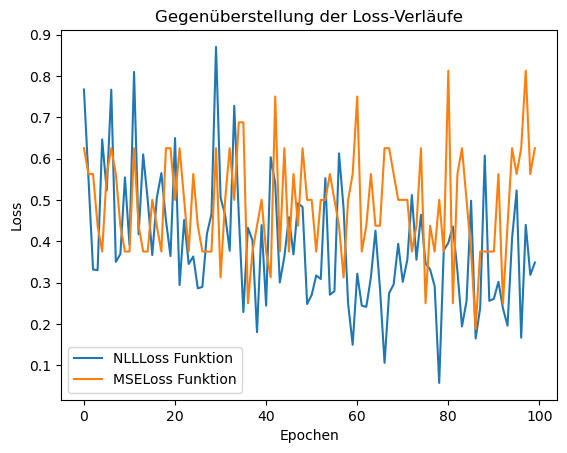

In [16]:
# Plotten des Loss gegeneinander: 

epochs = np.arange(0, 100, 1)

plt.plot(epochs, loss_NLL,label = 'NLLLoss Funktion')
plt.plot(epochs, loss_MSE,label = 'MSELoss Funktion')
plt.xlabel("Epochen")
plt.ylabel("Loss")
plt.title("Gegenüberstellung der Loss-Verläufe")
plt.legend()
plt.show

Bei den kleinen Loss Werten ist ein Overfitting sehr wahrscheinlich, deswegen wird folgend das Netzwerk verkleidert!

In [17]:
# NLLLoss, verkleinert: 

import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 64),
            nn.Tanh(),
            nn.Linear(64, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100
loss_NLL = np.zeros(n_epochs)
for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_NLL[epoch-1] =  loss.detach().numpy()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.469228
Epoch: 1, Loss: 0.589166
Epoch: 2, Loss: 0.460982
Epoch: 3, Loss: 0.558838
Epoch: 4, Loss: 0.462582
Epoch: 5, Loss: 0.508248
Epoch: 6, Loss: 0.440258
Epoch: 7, Loss: 0.607240
Epoch: 8, Loss: 0.394138
Epoch: 9, Loss: 0.519090
Epoch: 10, Loss: 0.363466
Epoch: 11, Loss: 0.537101
Epoch: 12, Loss: 0.552361
Epoch: 13, Loss: 0.543333
Epoch: 14, Loss: 0.512829
Epoch: 15, Loss: 0.271225
Epoch: 16, Loss: 0.580487
Epoch: 17, Loss: 0.659928
Epoch: 18, Loss: 0.258681
Epoch: 19, Loss: 0.474839
Epoch: 20, Loss: 0.565480
Epoch: 21, Loss: 0.283097
Epoch: 22, Loss: 0.699912
Epoch: 23, Loss: 0.333629
Epoch: 24, Loss: 0.424441
Epoch: 25, Loss: 0.573208
Epoch: 26, Loss: 0.488402
Epoch: 27, Loss: 0.463748
Epoch: 28, Loss: 0.437721
Epoch: 29, Loss: 0.197794
Epoch: 30, Loss: 0.267404
Epoch: 31, Loss: 0.525486
Epoch: 32, Loss: 0.395777
Epoch: 33, Loss: 0.321344
Epoch: 34, Loss: 0.255941
Epoch: 35, Loss: 0.794796
Epoch: 36, Loss: 0.555752
Epoch: 37, Loss: 0.499382
Epoch: 38, Loss: 0.340

In [18]:
# MSELoss, verkleinert: 

import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 64),
            nn.Tanh(),
            nn.Linear(64, 1),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.MSELoss()

n_epochs = 100

loss_MSE = np.zeros(n_epochs)
for epoch in range(n_epochs):
    
    for imgs, labels in train_loader:
        labels = labels.float()
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss2 = loss_fn(outputs,labels.view(-1, 1))
        
        optimizer.zero_grad()
        loss2.backward()
        
        optimizer.step()
        
    
    print("Epoch: %d, Loss: %f" % (epoch, float(loss2)))
    loss_MSE[epoch-1] =  loss2.detach().numpy()

Epoch: 0, Loss: 0.437500
Epoch: 1, Loss: 0.562500
Epoch: 2, Loss: 0.562500
Epoch: 3, Loss: 0.750000
Epoch: 4, Loss: 0.687500
Epoch: 5, Loss: 0.312500
Epoch: 6, Loss: 0.812500
Epoch: 7, Loss: 0.750000
Epoch: 8, Loss: 0.437500
Epoch: 9, Loss: 0.500000
Epoch: 10, Loss: 0.562500
Epoch: 11, Loss: 0.312500
Epoch: 12, Loss: 0.625000
Epoch: 13, Loss: 0.437500
Epoch: 14, Loss: 0.500000
Epoch: 15, Loss: 0.375000
Epoch: 16, Loss: 0.437500
Epoch: 17, Loss: 0.812500
Epoch: 18, Loss: 0.437500
Epoch: 19, Loss: 0.625000
Epoch: 20, Loss: 0.750000
Epoch: 21, Loss: 0.250000
Epoch: 22, Loss: 0.500000
Epoch: 23, Loss: 0.375000
Epoch: 24, Loss: 0.500000
Epoch: 25, Loss: 0.500000
Epoch: 26, Loss: 0.437500
Epoch: 27, Loss: 0.687500
Epoch: 28, Loss: 0.687500
Epoch: 29, Loss: 0.500000
Epoch: 30, Loss: 0.687500
Epoch: 31, Loss: 0.750000
Epoch: 32, Loss: 0.625000
Epoch: 33, Loss: 0.500000
Epoch: 34, Loss: 0.562500
Epoch: 35, Loss: 0.750000
Epoch: 36, Loss: 0.500000
Epoch: 37, Loss: 0.500000
Epoch: 38, Loss: 0.437

<function matplotlib.pyplot.show(close=None, block=None)>

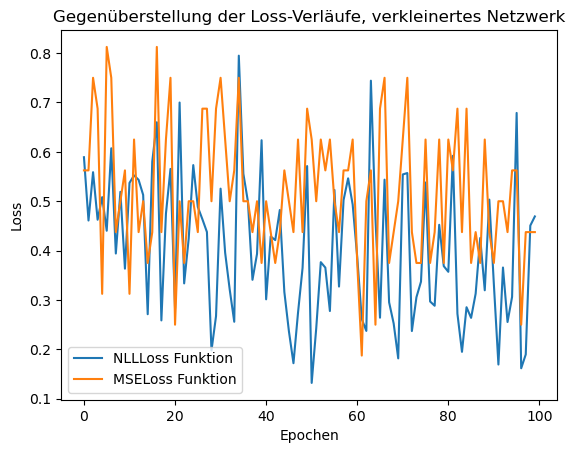

In [19]:
# Plotten des Loss gegeneinander: 

epochs = np.arange(0, 100, 1)

plt.plot(epochs, loss_NLL,label = 'NLLLoss Funktion')
plt.plot(epochs, loss_MSE,label = 'MSELoss Funktion')
plt.xlabel("Epochen")
plt.ylabel("Loss")
plt.title("Gegenüberstellung der Loss-Verläufe, verkleinertes Netzwerk")
plt.legend()
plt.show

Wie man erkennt, sind die Loss-Werte nur um ca 1% geringer geworden, das Übertraining also nur gering abgeschwächt worden.